# **Group Project 2: Data Structures in Action Table of Contents & Text Analysis**

Samanwita Mukherjee, Andrea Caceres, Chushmitha Battula, Sam Goodell

## **Question 1: Build a Table of Contents (Tree)**

**Task:** Create a hierarchical Table of Contents (TOC) from a Data Science / AI technical book

**Textbook Title:** Data Science and Predictive Analytics (2020)

**Author:** Ivo D. Dinov

## **Import and Clean Table of Contents:**

In [ ]:
#Import packages
import pandas as pd
from IPython.display import display, HTML
import matplotlib.pyplot as plt
from collections import Counter
import string
import re as re

In [ ]:
!pip -q install gdown

import gdown, os

FILE_ID = "17TUKK5KNXvE3tr3STZHNK_QL4Wpwcu_Z"
OUTPUT = "table_of_contents_corrected.txt"

if not os.path.exists(OUTPUT):
    gdown.download(id=FILE_ID, output=OUTPUT, quiet=False)

with open(OUTPUT, encoding="utf-8") as file:
    contents = file.read()

cleaned_contents = []

#split text at each new line
for line in contents.splitlines():
    #remove leading and trailing spaces
    strip = line.strip()
    #remove all instances of 2 or more periods
    replace_period = re.sub(r'\.{2,}',"", strip)
    #create list by splitting at instances of 2 spaces
    split = replace_period.split("  ")
    #keep lists with lengths greater than 2, append
    if len(split) > 2:
        cleaned_contents.append(split)

Downloading...
From: https://drive.google.com/uc?id=17TUKK5KNXvE3tr3STZHNK_QL4Wpwcu_Z
To: /content/table_of_contents_corrected.txt
100%|██████████| 56.0k/56.0k [00:00<00:00, 40.2MB/s]


##**Create Node Class and Methods:**

In [ ]:
#create node class
class Node:
    def __init__(self, book, section, title, page):
        self.section = section
        self.title = title
        self.page = page
        self.book = book
        #create section order, count of periods in section + 1
        self.section_order = section.count(".") + 1 if section else 0
        self.total = 0
        self.children = []

    #assumes sorted table of contents
    def insert_section(self, section, title, page):
        new_section = Node(self.book, section, title, page)
        new_order = new_section.section_order
        #if section order is 1 greater than root/current node, appending to current node's children
        if new_order == self.section_order + 1:
            self.children.append(new_section)
            #increment total nodes
            self.total += 1
            return new_section
        #if not a direct child, loop through each child node
        for children in self.children:
            #check if child is in section lineage
            if section.startswith(children.section + "."):
                #if so, recurse with child node
                inserted = children.insert_section(section, title, page)
                #increment total nodes
                if inserted:
                    self.total+=1
                return inserted
        print(f"Could not add {new_section.title}, {new_section.section}")

    #loop through cleaned list of contents
    def insert_many(self, arr):
        for val in arr:
            self.insert_section(val[0], val[1], val[2])


    def display_TOC(self, book):
        if book is None:
            return
        queue = []
        queue.append(book)
        while len(queue) > 0:
            print(queue[0].book, queue[0].section, queue[0].title, queue[0].page)
            cur_section = queue.pop(0)
            for element in cur_section.children:
                queue.append(element)

    def print_toc(self, mode):
      # will store the values in list instead of printing them all
        lines = []
        def traverse(node, chapter_hierarchy, level):
          # wit
            if node.title:
              # if the node has an existing not none title, we concatenate the hierarchy to use it later in the numbered indentation
                number_str = ".".join(str(num) for num in chapter_hierarchy)
              # level helps with keeps track of how many indent positions should we apply based on the level in TOC
                indent = "  " * level
                if mode == "plain":
              # we just print the book TOC titles, when asked for plain formatting
                    lines.append(node.title)
                elif mode == "indented":
              # we use the pre-calculated indent variable and concatenate it to the title, when its asked to print with indentation format
                    lines.append(indent + node.title)
              # to print with number and indentation we use the above 2 pre-calculated variables to display the contents as requried
                elif mode == "numbered":
                    lines.append(indent + (f"{number_str} " if number_str else "") + node.title)

           # we loop over the children [], and perform preorder traversal here, to print the current node first and look into its children node, to maintain the TOC structure

            for i, child in enumerate(node.children, 1):

                traverse(child, chapter_hierarchy + [i], level + 1)

        # initial function call, that will execute the function

        traverse(self, [], 0)

        # returns the list of lines we required from the TOC, which will be used in the show_toc() method to display it correctly

        return lines

    def show_toc(book, mode):
      # method used to print the TOC in the colab cells without any interrupted
        toc_lines = book.print_toc(mode)
      # adds the line break after each line of the content to display it in html content
        html_block = "<br>".join(toc_lines)
        display(HTML(f"""<div style="max-height: 400px; overflow-y: auto; white-space: pre; font-family: monospace;">{html_block}</div>"""))


    def tree_height(self):
        #initialize empty array
        heights_arr = []
        #check for children of root/current node
        if self.children:
            #iterate over each child node
            for children in self.children:
                #recurse to each leaf
                height = children.tree_height()
                #after recursion, append height of each leaf
                heights_arr.append(height)
        #base case - return 0 because root node has height 0
        else:
            return 0
        # return max height + 1 to increment each recurion
        return 1 + max(heights_arr)

    def tree_depth(self, title):
        # using dfs approach here as we want to have the minimal traversal made to identify the actual title
        # we start with 0 at the root and the depth is 0 at root
        if self.book == title:
          return 0
        def dfs(node, depth):
          # check with title and return the depth when founded
            if node.title == title:
                return depth
            for child in node.children:
          # we loop through all the children [] and increase the depth by 1, with each recursive call
                result = dfs(child, depth + 1)
                if result is not None:
                    return result
            return None
        # this will call our dfs method
        return dfs(self, 0)


**Test Methods:**

In [ ]:
#Create root (book)
book = Node(book = "Data Science and Predictive Analytics", section = None, title = None, page = None)

#Insert all elements
book.insert_many(cleaned_contents)

#Show total elements in TOC
print(f"Total Sections in Table of Contents: {book.total}")

#Find tree height
print(f"Max Height in Table of Contents: {book.tree_height()}")

#Find depth with the title
print(f"Depth of Title: {book.tree_depth('Parkinson’s Disease')}")


Total Sections in Table of Contents: 579
Max Height in Table of Contents: 3
Depth of Title: 3


In [ ]:
book.show_toc("plain")


In [ ]:
book.show_toc("indented")

In [ ]:
book.show_toc("numbered")

## **Discussion and Explanations**

**Tree Design**

We implemented a single node class with attributes describing the section (ex. "1.3.7"), title (ex. "Data Visualization"), page, total book sections, children, section_order, and book.  The section_order is deduced from the count of periods in each section string + 1, and describes the relative depth.

The book is identified as the root node, and its attribute "book" is inherited by each of the sections.

**Insertion Strategy**

To insert, the function first checks if it's section order is one more than that of the root (book) node.  If so, it immediately appends to the root's children attrribute and increments the tree's total sections.  If the inserted node is not a direct child, the function will loop through the children of the root node and check for a match in section lineage.  Once a match is identified, the insert function is recurively called and the total is updated.  An additional method, insert_many, calls insert_section for each item in an array of contents.

In this case, we are assuming that the table of contents are naturally sorted before insertion.  If a node were to be inserted before its parent node, the inserted section would not find a lineage match.  In such cases, the user would be prompted with a message indicating that the section could not be added to the contents.

In the best case, an individual insertion would have a time complexity of O(1) in the instance that the inserted node is a direct child of the root.  In the worst case (assuming a very unbalanced tree), the function will recurse through every node before finding its proper parent node, resulting in a time complexity of O(n).  However, in the average case, a relatively balanced tree will only require O(log n) comparisons before placing the inserted node.

**Traversal Method and Justification**
We have used the preoder traversal to print the Table of Contents in the use case. The requirement is to print the contents in order and since there is hierarchy and we want to make sure that chapter -> sub-chapter -> sub-sub-chapter order is maintained in the output, we want to make sure the root/ the parent node is printed first, before we traverse its children nodes.
Breadth-first search (BFS) would ideally first print all the chapters, the recursively consider one chapter at a time and print all its sub-chapters at all and all the sub-sub-chapters in the next iteration. This is not ideally considered to be the right approach to print the table of contents, since it will list all the available chapters first, all the sub-chapters and then go to all the sub-sub-chapters. Since we chose to consider pre-order traversal which is one of the techniques under Depth First Search (DFS) we are using a combination of pre-order + DFS methods here as our traversal methods for the Table of Contents (TOC).

#**Question 2**

In [ ]:
#Andrea's Progress
import requests

url = "https://www.gutenberg.org/cache/epub/768/pg768.txt"
text = requests.get(url).text
print(text)

﻿The Project Gutenberg eBook of Wuthering Heights
    
This ebook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no restrictions
whatsoever. You may copy it, give it away or re-use it under the terms
of the Project Gutenberg License included with this ebook or online
at www.gutenberg.org. If you are not located in the United States,
you will have to check the laws of the country where you are located
before using this eBook.

Title: Wuthering Heights

Author: Emily Brontë

Release date: December 1, 1996 [eBook #768]
                Most recently updated: January 18, 2022

Language: English

Credits: David Price


*** START OF THE PROJECT GUTENBERG EBOOK WUTHERING HEIGHTS ***




Wuthering Heights

by Emily Brontë




CHAPTER I


1801—I have just returned from a visit to my landlord—the solitary
neighbour that I shall be troubled with. This is certainly a beautiful
country! In all England, I do not believe that I could

In [ ]:
#Converting text to lowercase while keeping a copy
original = text
lowercase = text.lower()

#Remove apostrophes besides ones in words, digits, and special characters
import re
def clean_lower(text):
  text = re.sub(r"[^a-z\s']", " ",text)
  text = re.sub(r"\b'\b","",text)
  text = re.sub(r"\s+", " ", text).strip()
  return text

#Tokenize the white space
tokens = clean_lower(lowercase).split()

#Use NLTK's stopwords only
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

stopwordss= set(stopwords.words('english'))
tokens_filtered = []
for word in tokens:
  if word not in stopwordss:
    tokens_filtered.append(word)

print("Token Count Before:", len(tokens))
print("Token Count After:", len(tokens_filtered))

Token Count Before: 122401
Token Count After: 56362


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,Letters,Count,Proportion
15,a,39081,0.078299
9,b,6840,0.013704
5,c,11721,0.023483
18,d,24316,0.048717
1,e,65086,0.130400


Text(0, 0.5, 'Proportion')

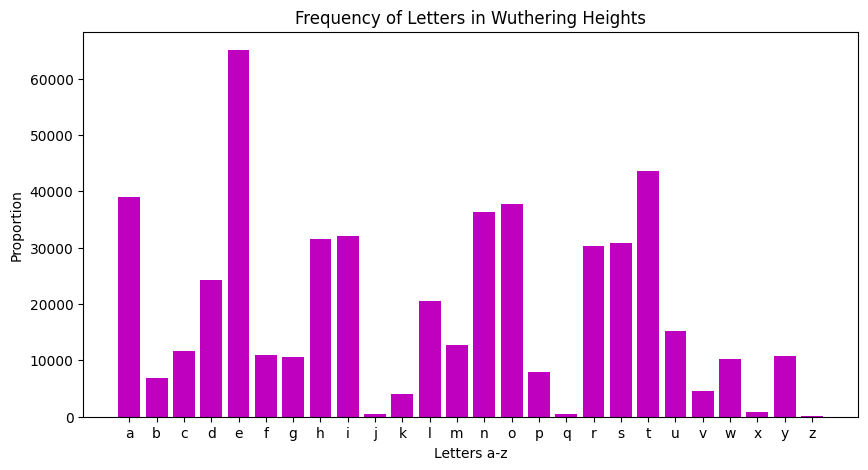

In [ ]:
#Letter Frequencies
letters = re.findall(r"[a-z]", text)
count_letters = Counter(letters)

#Create a dataframe for Letter Counts
letters_df = pd.DataFrame(count_letters.items(), columns = ["Letters", "Count"]).sort_values(by="Letters")

#Create a dataframe for Proportions
letters_df["Proportion"] = letters_df["Count"]/letters_df["Count"].sum()

#Data Frame of Letter Counts
display(letters_df.head())

#Plotting Letter Frequencies
plt.figure(figsize=(10,5))
plt.bar(letters_df["Letters"], letters_df["Count"], color = "m")
plt.title("Frequency of Letters in Wuthering Heights")
plt.xlabel("Letters a-z")
plt.ylabel("Proportion")

,Words,Count,Proportions
0,heathcliff,476,0.061459
1,would,443,0.057198
2,linton,406,0.052421
3,catherine,382,0.049322
4,said,375,0.048418
5,mr,312,0.040284
6,one,293,0.037831
7,could,282,0.036411
8,master,205,0.026469
9,shall,198,0.025565


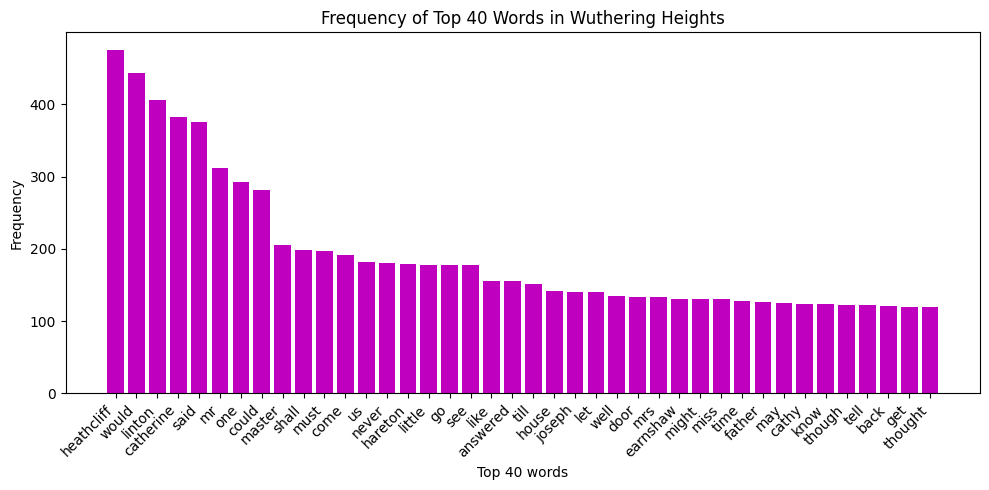

In [ ]:
#Word Frequencies
wordcount = Counter(tokens_filtered)
#Top 40 Common Words
top_forty= wordcount.most_common(40)
df_top_forty = pd.DataFrame(top_forty, columns = ["Words","Count"])
df_top_forty["Proportions"] = df_top_forty["Count"] / df_top_forty["Count"].sum()
#Table of top 40 words
display(df_top_forty.head(15))

#Plot of Top 40 Common Words Frequencies
plt.figure(figsize=(10,5))
plt.bar(df_top_forty["Words"], df_top_forty["Count"], color = "m")
plt.title("Frequency of Top 40 Words in Wuthering Heights")
plt.xticks(rotation=45, ha="right")
plt.xlabel("Top 40 words")
plt.ylabel("Frequency")
plt.tight_layout()
#End of Andrea's Progress so far